# **Sparks Foundation - Graduate Rotational Internship Program (GRIP)**

# **Computer Vision & Internet of Things (IoT)**

# **Task-5: Traffic Sign Classification/Recognition System**

# **Dataset link:** https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# **Done by: Pulkit Singh** 

**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%tensorflow_version 1.5
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir('/content/drive/MyDrive/Traffic_Sign_Recognition')

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


**Pre-processing the dataset images**

In [ ]:
data =[]
labels = []
classes =43 
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'Train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'/'+ a)             
            image = image.resize((30,30))                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

**Converting images to NumPy Arrays & Saving them for future use**

In [ ]:
data = np.array(data) 
labels = np.array(labels)
np.save('./training/data',data)
np.save('./training/target',labels)
print(data.shape, labels.shape) 

(39219, 30, 30, 3) (39219,)


**Split into training and testing data**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31375, 30, 30, 3) (7844, 30, 30, 3) (31375,) (7844,)


**Converting labels into single encoding**

In [ ]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

**Building Model**

In [ ]:
model = Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) #Because we use 43 classes


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



**Compiling & Training the model**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 20 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Train on 31375 samples, validate on 7844 samples
Epoch 1/20
31375/31375 [==============================] - 159s 5ms/step - loss: 2.1662 - accuracy: 0.4544 - val_loss: 0.6406 - val_accuracy: 0.8349
Epoch 2/20
31375/31375 [==============================] - 159s 5ms/step - loss: 0.7824 - accuracy: 0.7640 - val_loss: 0.2195 - val_accuracy: 0.9445
Epoch 3/20
31375/31375 [==============================] - 162s 5ms/step - loss: 0.4586 - accuracy: 0.8607 - val_loss: 0.1608 - val_accuracy: 0.9565
Epoch 4/20
31375/31375 [==============================] - 159s 5ms/step - loss: 0.3495 - accuracy: 0.8979 - val_loss: 0.1934 - val_accuracy: 0.9440
Epoch 5/20
31375/31375 [==============================] - 158s 5ms/step - loss: 0.2791 - accuracy: 0.9195 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 6/20
31375/31375 [==============================] - 157s 5ms/step - loss: 0.2590 - accuracy: 0.9244 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 7/20
31375/31375 [==============================] - 158s

**Plotting accuracy of the model**

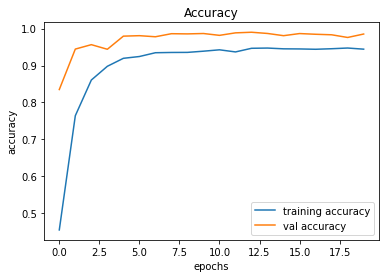

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Plotting loss of the model**

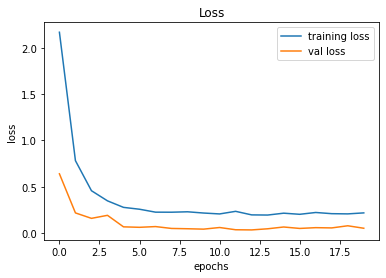

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Testing the test data**

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label


In [ ]:
X_test, label = testing('Test.csv')


In [ ]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  6,  7, 10])

**Calculating the accuracy of test data and saving the model**

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(label, Y_pred)
print(acc)


0.951464766429137


In [ ]:
model.save("./training/TSR.h5")

**Loading the model**

In [1]:
%tensorflow_version 1.5
!pip uninstall h5py
!pip install h5py==2.10.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 2.9 MB 8.4 MB/s 


In [2]:
import os
os.chdir(r'/content/drive/MyDrive/Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.




**Defining the Classes of Traffic Signs**

In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

**Importing images we need for the prediction**

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred


**Performing prediction on an image**

Predicted traffic sign is:  Speed limit (60km/h)


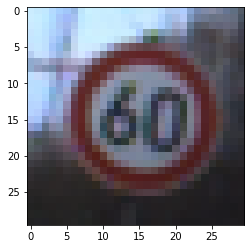

In [5]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/Traffic_Sign_Recognition/Test/00595.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()